In [1]:
# Import des bibliothèques pour analyse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline 

import scipy.stats as stats
import seaborn as sns


In [2]:
# Lecture du dataset 
df = pd.read_csv('Bike P(Y)TH - PARIS.csv',sep=';')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (2,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Affichage des  premières lignes du dataframe
df.head()

,Identifiant du compteur,Nom du compteur,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,4,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,30,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,116,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,18,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"


In [4]:
# Affichage des informations du dataframe df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594556 entries, 0 to 594555
Data columns (total 9 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   Identifiant du compteur                  594556 non-null  object
 1   Nom du compteur                          594555 non-null  object
 2   Identifiant du site de comptage          594555 non-null  object
 3   Nom du site de comptage                  594555 non-null  object
 4   Comptage horaire                         594555 non-null  object
 5   Date et heure de comptage                594555 non-null  object
 6   Date d'installation du site de comptage  594555 non-null  object
 7   Lien vers photo du site de comptage      594555 non-null  object
 8   Coordonnées géographiques                594555 non-null  object
dtypes: object(9)
memory usage: 40.8+ MB


In [5]:
# Affichage de la description du dataframe df

df.describe()

,Identifiant du compteur,Nom du compteur,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques
count,594556,594555,594555,594555,594555,594555,594555,594555,594555
unique,83,82,121,61,1262,17473,31,61,61
top,100036718-104036718,100 Rue La Fayette O-E,100007049,18 quai de l'hotel de ville,0,2019-03-31T03:00:00+02:00,2017-07-12,https://www.eco-visio.net/Photos/100036719/149...,"48.85372,2.35702"
freq,17474,17474,30733,34948,51521,84,69895,34948,34948


In [6]:
# Nous constatons à ce stade que le type de variable n'est pas le bon pour chaque colonne il va donc
# transformer ces variables pour pouvoir les analyser correctement
# Par ailleurs, nous constatons aussi que le nom des colonnes devra être revu pour harmoniser l'ensemble
# et faciliter leurs utilisations

In [6]:
#Renommage des colonnes
df.set_axis(['idcompteur', 'nomcompteur', 'idsite', 'nomsite', 'comptagehoraire', 'dateheurecomptage', 'dateinstall', 'photo', 'coord'], 
                    axis='columns', inplace=True)
df.head()

,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,coord
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,4,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,30,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,116,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547,6 rue Julia Bartet,18,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149"


In [7]:
# Changement du type de la colonne comptageHoraire
df['comptagehoraire'] = df['comptagehoraire'].apply(pd.to_numeric, errors='coerce')

# Changement du type de la colonne idsite
df['idsite'] = df['idsite'].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594556 entries, 0 to 594555
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   idcompteur         594556 non-null  object 
 1   nomcompteur        594555 non-null  object 
 2   idsite             594554 non-null  float64
 3   nomsite            594555 non-null  object 
 4   comptagehoraire    594554 non-null  float64
 5   dateheurecomptage  594555 non-null  object 
 6   dateinstall        594555 non-null  object 
 7   photo              594555 non-null  object 
 8   coord              594555 non-null  object 
dtypes: float64(2), object(7)
memory usage: 40.8+ MB


In [8]:
# Création des colonnes liées à la date et heure

df['date'] = pd.to_datetime(df.dateheurecomptage,errors = 'coerce',utc = True) 
df['day'] = df['date'].dt.weekday
df['month'] = df['date'].dt.month
df['hour'] = df.date.dt.hour

df.head()

,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,coord,date,day,month,hour
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",2018-11-29 00:00:00+00:00,3.0,11.0,0.0
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",2018-11-29 21:00:00+00:00,3.0,11.0,21.0
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,116.0,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",2018-11-30 16:00:00+00:00,4.0,11.0,16.0
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",2018-12-03 00:00:00+00:00,0.0,12.0,0.0
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,18.0,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,"48.82648,2.303149",2018-12-03 10:00:00+00:00,0.0,12.0,10.0


In [9]:
#Suppression de la ligne de titre en trop
indexNames = df[df.idcompteur == "Identifiant du compteur"].index
df.drop(indexNames , inplace=True)

In [10]:
# Suppression des lignes ne possédant pas de coordonnées (la dernière ligne du fichier est corrompue)
df = df[-df['coord'].isnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594554
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   idcompteur         594554 non-null  object             
 1   nomcompteur        594554 non-null  object             
 2   idsite             594554 non-null  float64            
 3   nomsite            594554 non-null  object             
 4   comptagehoraire    594554 non-null  float64            
 5   dateheurecomptage  594554 non-null  object             
 6   dateinstall        594554 non-null  object             
 7   photo              594554 non-null  object             
 8   coord              594554 non-null  object             
 9   date               594554 non-null  datetime64[ns, UTC]
 10  day                594554 non-null  float64            
 11  month              594554 non-null  float64            
 12  hour               594554 non-

In [11]:
# Passage de type "object" à "datetime" pour la variable datainstall

df.loc[df['dateinstall']=="Date d'installation du site de comptage",'dateinstall'] ='06/09/2019'
df['dateinstall'] = pd.to_datetime(df['dateinstall'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594554
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   idcompteur         594554 non-null  object             
 1   nomcompteur        594554 non-null  object             
 2   idsite             594554 non-null  float64            
 3   nomsite            594554 non-null  object             
 4   comptagehoraire    594554 non-null  float64            
 5   dateheurecomptage  594554 non-null  object             
 6   dateinstall        594554 non-null  datetime64[ns]     
 7   photo              594554 non-null  object             
 8   coord              594554 non-null  object             
 9   date               594554 non-null  datetime64[ns, UTC]
 10  day                594554 non-null  float64            
 11  month              594554 non-null  float64            
 12  hour               594554 non-

In [12]:
df.duplicated().sum() # absence de  doublons

0

In [13]:
df.isna().sum(axis=0) # ABSENCE de valeurs manquantes

idcompteur           0
nomcompteur          0
idsite               0
nomsite              0
comptagehoraire      0
dateheurecomptage    0
dateinstall          0
photo                0
coord                0
date                 0
day                  0
month                0
hour                 0
dtype: int64

In [15]:
# A ce stade il n'y a plus aucune valeur nulle ou de doublons et nous avons harmonisé le nom des variables ainsi que leur type

In [14]:
## RELATION ENTRE VARIABLES NUMERIQUES  "idsite" vs "comptagehoraire"
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df['idsite'],df['comptagehoraire'] ), index=['coef_pearson','p_value'],columns=['Result'] )
# ces 2 variables sont décorelées

,Result
coef_pearson,0.060552
p_value,0.000000


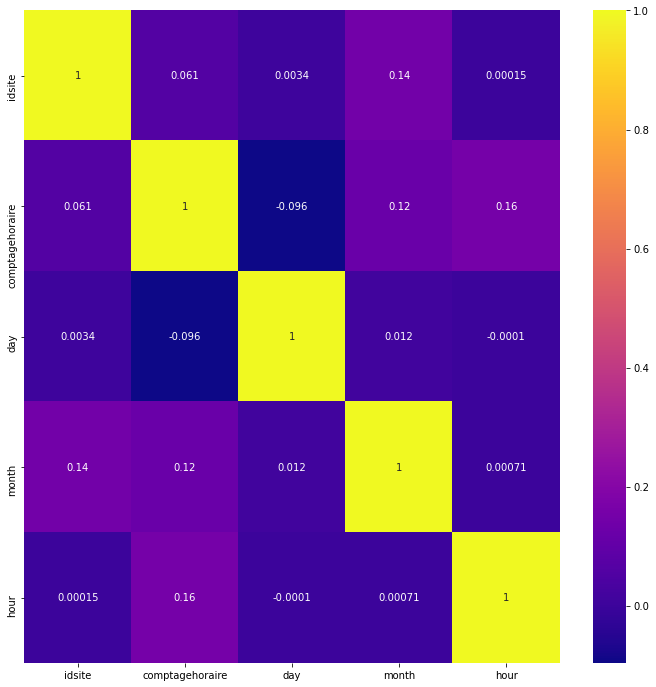

In [15]:
# Affichage de la heat map des corrélations de toutes les variables qualitatives de df
dfcor = df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dfcor, annot= True, ax= ax, cmap="plasma");

In [18]:
### RELATION ENTRE VARIABLES NUMERIQUES ET CATEGORIELLES : "idsite vs(Coord, nomsite,photo,nomcompteur)"###
    
import statsmodels.api
result = statsmodels.formula.api.ols('idsite ~ coord', data = df).fit()
table1 = statsmodels.api.stats.anova_lm(result)
display(table1)
# le site  fortement correlé aux coordonnées géo.#


result = statsmodels.formula.api.ols('idsite  ~ nomsite', data = df).fit()
table2 = statsmodels.api.stats.anova_lm(result)
display(table2)
#le site  fortement correlé   au nom du lieu.#


result = statsmodels.formula.api.ols('idsite  ~ photo', data = df).fit()
table3 = statsmodels.api.stats.anova_lm(result)
display(table3)
#le site  fortement correlé à la photo du site.#

result = statsmodels.formula.api.ols('idsite  ~ nomcompteur', data = df).fit()
table4 = statsmodels.api.stats.anova_lm(result)
display(table4)
#le site  fortement correlé du  nom du COMPTEUR.#

,df,sum_sq,mean_sq,F,PR(>F)
coord,59.0,1.774734e+14,3.008024e+12,2.954702e+22,0.0
Residual,594494.0,6.052226e-05,1.018047e-10,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
nomsite,59.0,1.774734e+14,3.008024e+12,2.840556e+22,0.0
Residual,594494.0,6.295431e-05,1.058956e-10,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
photo,59.0,1.774734e+14,3.008024e+12,1.724294e+22,0.0
Residual,594494.0,1.037092e-04,1.744496e-10,NaN,NaN


,df,sum_sq,mean_sq,F,PR(>F)
nomcompteur,80.0,1.774734e+14,2.218418e+12,1.892961e+22,0.0
Residual,594473.0,6.966806e-05,1.171930e-10,NaN,NaN


In [16]:
# Splitter la colonne 'coord' en 2 colonnes comprenant les 'longitudes' et les 'latitudes'

# Créer 2 listes pour la boucle for
lat = []
lon = []

# Pour chaque ligne de la variables 'coord',
for row in df['coord']:
    # On va,
    try:
        # Splitter la ligne avec la virgule et utiliser 
        # append pour ce qui est avant celle-ci à ajouter dans 'lat'
        lat.append(row.split(',')[0])
        # Splitter la ligne avec la virgule et utiliser 
        # append pour ce qui est avant celle-ci à ajouter dans 'lon'
        lon.append(row.split(',')[1])
    # Si il y a une erreur de coordonnées on crée une exception
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)

# Création des 2 nouvelles colonnes avec lat et lon
df['lat'] = lat
df['long'] = lon


In [17]:
# Transformation du type de variable des colonnes latitude et longitude
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

# Suppression de la colonne GPS 'coord' qui est inutile dorénavant
df = df.drop(['coord'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594554
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   idcompteur         594554 non-null  object             
 1   nomcompteur        594554 non-null  object             
 2   idsite             594554 non-null  float64            
 3   nomsite            594554 non-null  object             
 4   comptagehoraire    594554 non-null  float64            
 5   dateheurecomptage  594554 non-null  object             
 6   dateinstall        594554 non-null  datetime64[ns]     
 7   photo              594554 non-null  object             
 8   date               594554 non-null  datetime64[ns, UTC]
 9   day                594554 non-null  float64            
 10  month              594554 non-null  float64            
 11  hour               594554 non-null  float64            
 12  lat                594554 non-

In [21]:
# DATAVIZ

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


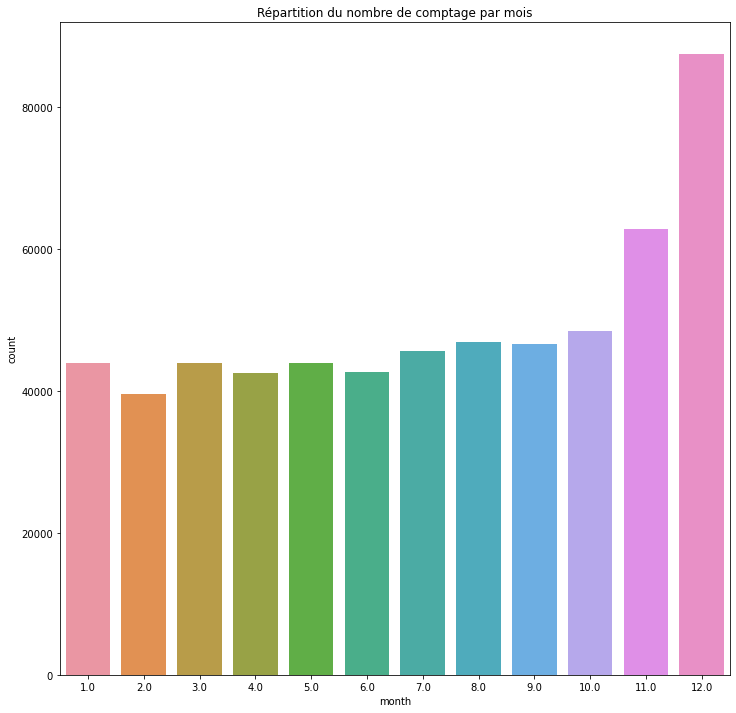

In [18]:
# Répartition du comptage par mois
plt.figure(figsize=(12,12))
sns.countplot("month",data=df)
plt.title('Répartition du nombre de comptage par mois');

<Figure size 864x864 with 0 Axes>

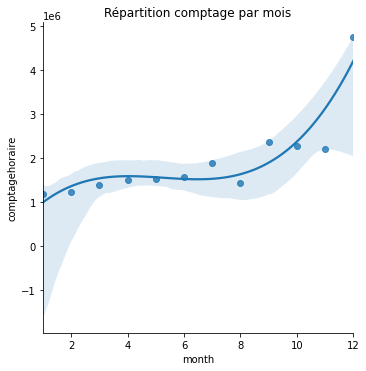

In [19]:
df2=df.groupby("month").sum()
df2=df2.reset_index()
plt.figure(figsize=(12,12))
sns.lmplot(x="month", y="comptagehoraire", data=df2, order=3)
plt.title('Répartition comptage par mois');



In [24]:
# Au vue de ces 2 graphiques, il y a une tendance à privilégier ce mode de transport en fin d'année. 
# En effet, les mois de novembre et décembre comptabilise le plus de cycliste.
# Il serait intéressant de voir la corrélation entre cette tendance et des évènements sur la circulation 
# qui serait arrivés sur la période ?

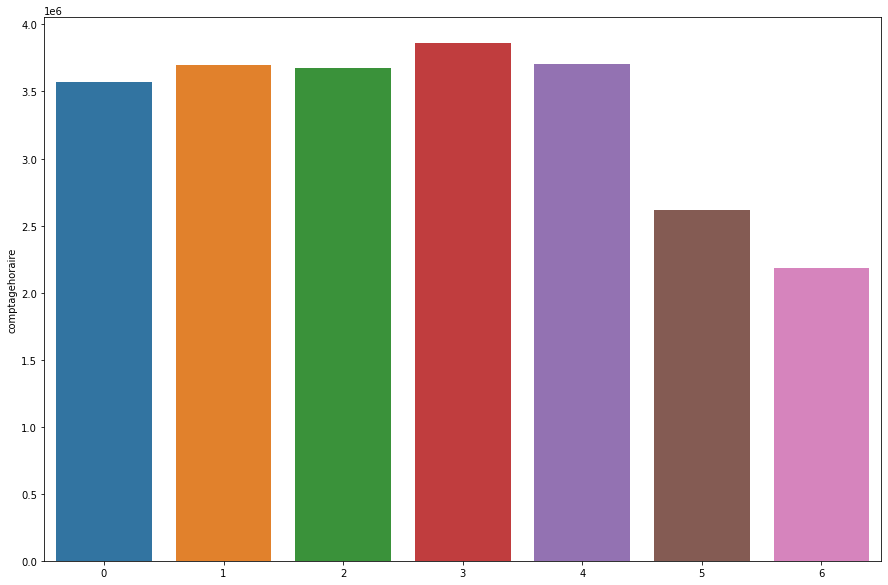

In [20]:
df3=df.groupby("day").sum()
df3=df3.reset_index()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=df3.index, y=df3["comptagehoraire"], ax=ax);

In [26]:
# On notera une baisse du trafic le weekend, ce mode de transport semblerait plus destibné à aller au travail que 
# pour se promener.

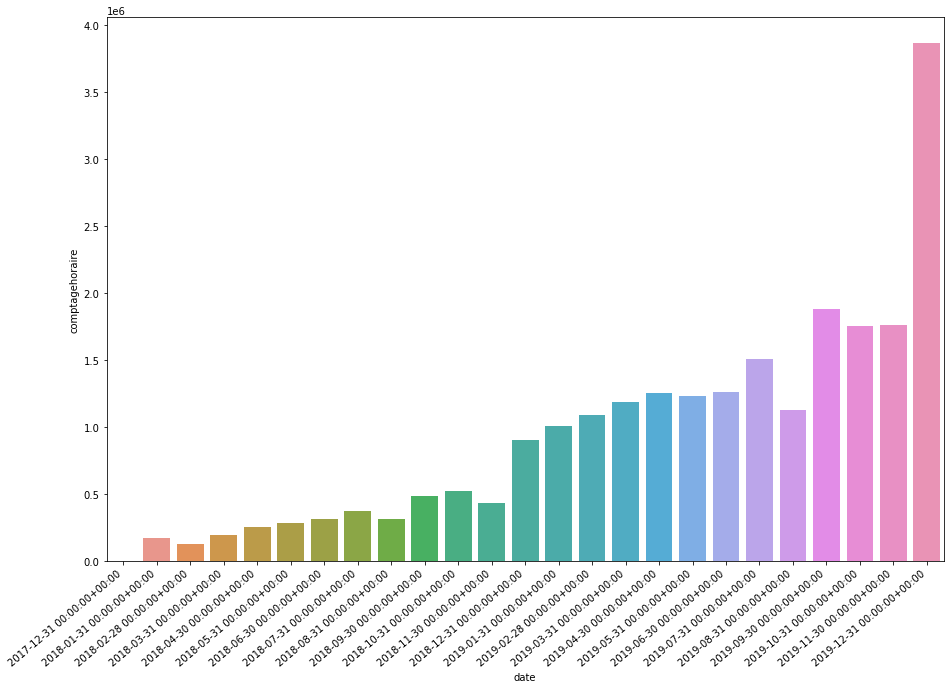

In [21]:
df4 = df.groupby(pd.Grouper(key='date',freq='M')).sum()
df4=df4.reset_index()
df4.head()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=df4.date, y=df4["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");


In [28]:
# La fin d'année 2019 rencontre la plus grosse affluence de cycliste, il y a suûrement un parallèle avec les grèves intervenus 
# fin 2019 et le ras le bol des metro user.

In [22]:
functions_to_apply = {
    'comptagehoraire' : lambda comptage: comptage.sum(),
    'lat' : lambda lat:lat.max(),
    'long' : lambda long:long.max()
}

df_grouped = df.groupby('idcompteur').agg(functions_to_apply)

df_grouped = df_grouped.dropna()
df_grouped.describe()


# In[100]:


import folium


def getColor(nb_passage,nb_max):
    tier_max = nb_max/3
    if(tier_max > nb_passage):
        return '#ee114d'
    if( tier_max < nb_passage < (tier_max*2)):        
        return '#eed311'
    if((tier_max*2) < nb_passage  ):        
        return '#28c0e2'
    
nb_max = df_grouped.comptagehoraire.max()

coords = (48.82648,2.303149)
map = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=15)
for ligne in df_grouped.T:
    t_radius = df_grouped.T[ligne].comptagehoraire/nb_max*50
    folium.CircleMarker(
       location = (df_grouped.T[ligne].lat, df_grouped.T[ligne].long),
       radius = t_radius,
       color = getColor(df_grouped.T[ligne].comptagehoraire,nb_max),
       fill = True,
       fill_color = getColor(df_grouped.T[ligne].comptagehoraire,nb_max),
       popup = str(df_grouped.T[ligne].comptagehoraire)
    ).add_to(map)
    coordonnees_gps = [df_grouped.T[ligne].lat, df_grouped.T[ligne].long]
# {folium.Marker(coordonnees_gps,popup = str(df_grouped.T[ligne].comptagehoraire),color = getColor(df_grouped.T[ligne].comptagehoraire)).add_to(map)
            # ajout à la carte de la commune

map         



In [30]:
# Ici nous pouvons voir les spots les plus actifs en terme de comptage de cyclistes.

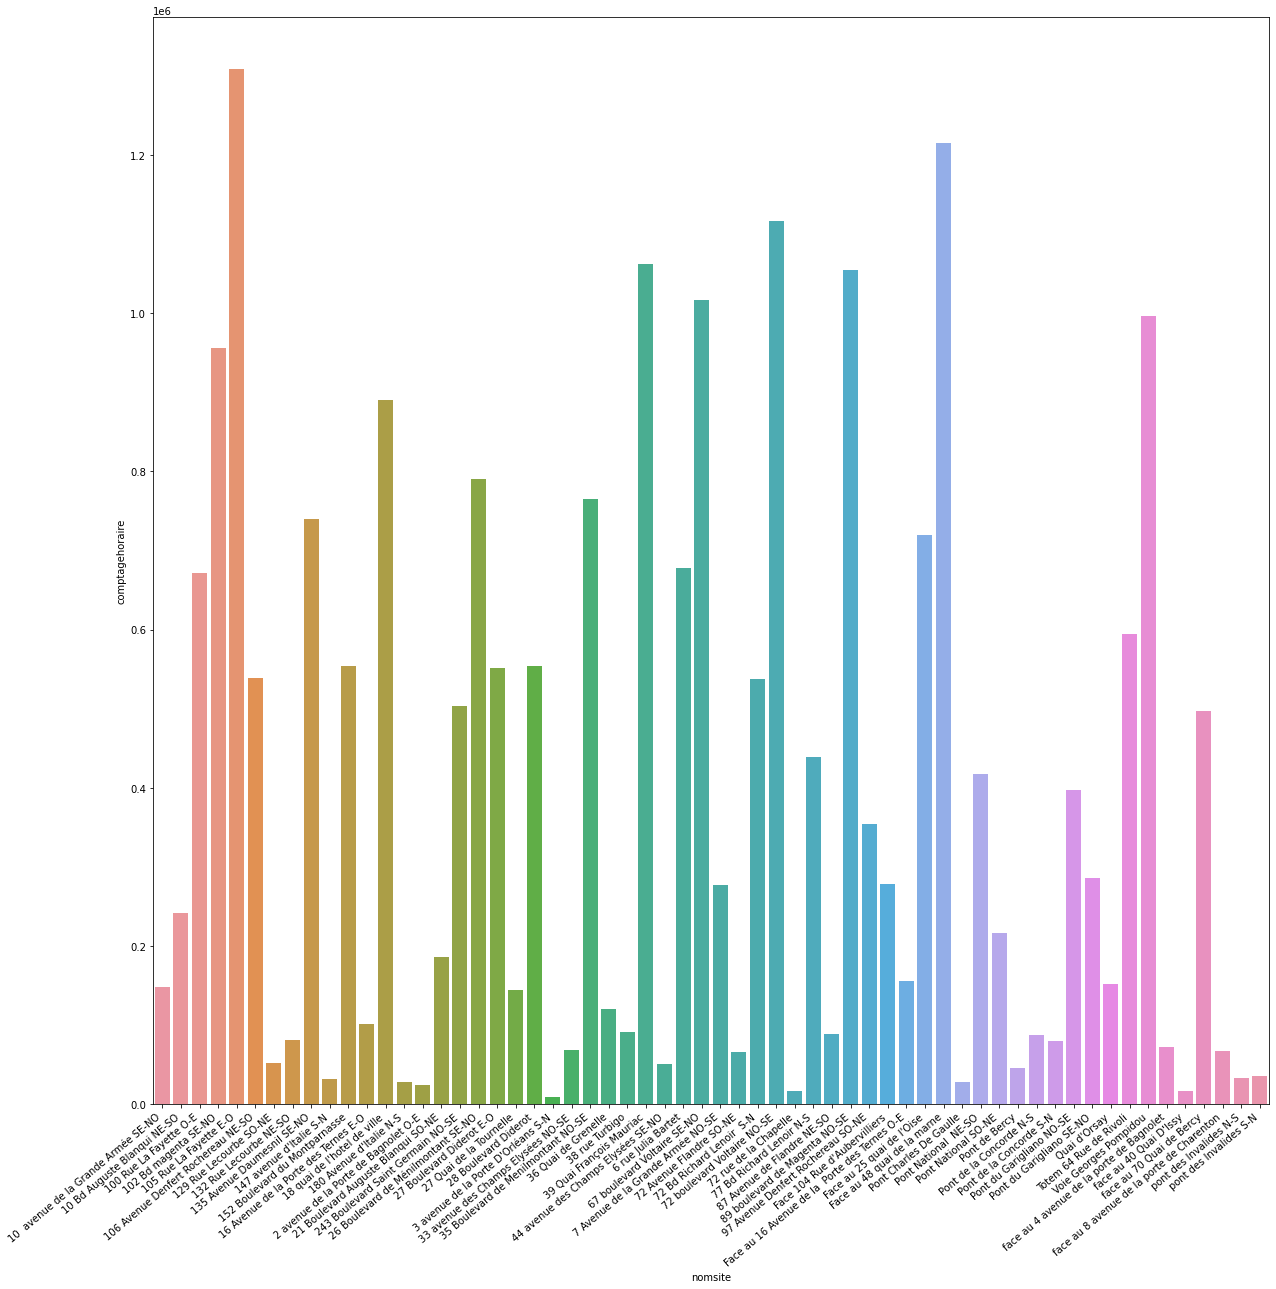

In [23]:
df5=df.groupby("nomsite").sum()
df5=df5.reset_index()
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x=df5.nomsite, y=df5["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

In [32]:
# Les spots qui comptabilisent le plus de cycliste sont dans le 10ème LAFAYETTE, dans le 19ème quai de la Marne 
# et dans le 11ème bvd Voltaire. A quoi est dû cette concentration ? Est ce les aménagements en pistes cyclables ? 
# Est des lieux plus attractifs pour les sorties, le travail ? Il serait bon de les comparés avec les points les moins
# attractifs pour faire une évaluation des différences et comprendre la tendance.

In [33]:
# Ainsi, nous avons pu voir plusieurs tendances sur les périodes qui comptabilisent le plus de comptage, 
# les lieux les plus chaud ou les disparités semaine/weekend.
# Il serait bon de croiser toutes ces données et voir si un modèle de prédiction pouvait nous aider à répondre à notre
# problématique et permettre d'anticiper ces mouvements.

In [24]:
g = sns.PairGrid(df, hue= 'idsite')
g.map(plt.scatter, alpha=0.6)
g.add_legend()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C61A8AE598> (for post_execute):


KeyboardInterrupt: 

In [25]:
df["numidcompteur"] = df["idcompteur"].replace(df["idcompteur"].unique(), list(range(0,len(df["idcompteur"].unique()))))


df.head()



,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,date,day,month,hour,lat,long,numidcompteur
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29 00:00:00+00:00,3.0,11.0,0.0,48.82648,2.303149,0
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29 21:00:00+00:00,3.0,11.0,21.0,48.82648,2.303149,0
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,116.0,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-30 16:00:00+00:00,4.0,11.0,16.0,48.82648,2.303149,0
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03 00:00:00+00:00,0.0,12.0,0.0,48.82648,2.303149,0
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,18.0,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03 10:00:00+00:00,0.0,12.0,10.0,48.82648,2.303149,0


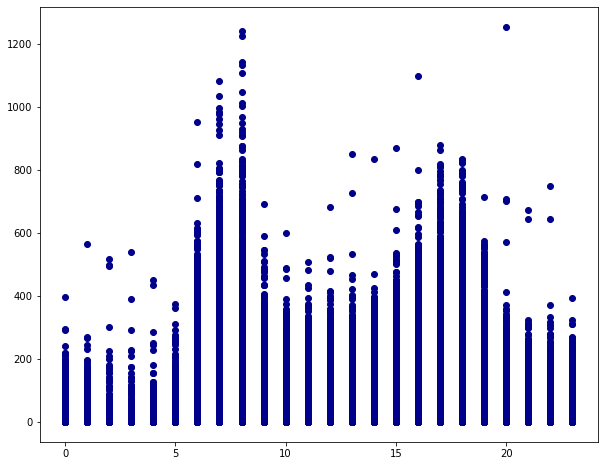

In [36]:
# Modélisation d'une régression linéaire multiple 


plt.figure(figsize= (10,8))
plt.scatter(df['hour'], df.comptagehoraire, color = 'darkblue');



In [37]:
target = df['comptagehoraire']
data = df[['hour']]

slr = LinearRegression()
slr.fit(data, target)

LinearRegression()

In [38]:
print(slr.intercept_)
print(slr.coef_)

24.43467309383196
[1.28384125]


In [39]:
cross_validate(slr, data, target, return_train_score=True, cv=4)

{'fit_time': array([0.05196047, 0.03339791, 0.04277754, 0.03329206]),
 'score_time': array([0.        , 0.00199389, 0.00716114, 0.00552773]),
 'test_score': array([-0.13953267,  0.02330081,  0.01622755,  0.01587146]),
 'train_score': array([0.02596061, 0.02329645, 0.02327697, 0.02394921])}

In [40]:
cross_validate(slr, data, target, return_train_score=True, cv=4)['test_score'].mean()

-0.021033213895817415

In [41]:
pred_target = slr.predict(data)
residus = pred_target - target
residus.describe()

count    5.945540e+05
mean     1.472826e-12
std      5.659062e+01
min     -1.206295e+03
25%     -9.172343e+00
50%      1.912461e+01
75%      2.785388e+01
max      5.396302e+01
Name: comptagehoraire, dtype: float64

In [42]:
from sklearn.feature_selection import f_regression
print('F-score:', f_regression(data, target)[0], 'p-value :', f_regression(data, target)[1])

F-score: [14661.06415361] p-value : [0.]


In [43]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(pred_target, target)

56.59057007050728

In [26]:
df7 = pd.read_csv('jours_feries_metropole.csv')

df7['date'] = pd.to_datetime(df7["date"],errors = 'coerce',utc = True)
df7['date'] = pd.to_datetime(df7["date"].dt.strftime('%Y-%m-%d'))

df7.info()
df7.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            286 non-null    datetime64[ns]
 1   annee           286 non-null    int64         
 2   zone            286 non-null    object        
 3   nom_jour_ferie  286 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 9.1+ KB


,date,annee,zone,nom_jour_ferie
0,2000-01-01,2000,Métropole,1er janvier
1,2000-04-24,2000,Métropole,Lundi de Pâques
2,2000-05-01,2000,Métropole,1er mai
3,2000-05-08,2000,Métropole,8 mai
4,2000-06-01,2000,Métropole,Ascension


In [27]:
df.head()

df['date'] = pd.to_datetime(df["date"].dt.strftime('%Y-%m-%d'))

df6 = df.copy()
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594554
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idcompteur         594554 non-null  object        
 1   nomcompteur        594554 non-null  object        
 2   idsite             594554 non-null  float64       
 3   nomsite            594554 non-null  object        
 4   comptagehoraire    594554 non-null  float64       
 5   dateheurecomptage  594554 non-null  object        
 6   dateinstall        594554 non-null  datetime64[ns]
 7   photo              594554 non-null  object        
 8   date               594554 non-null  datetime64[ns]
 9   day                594554 non-null  float64       
 10  month              594554 non-null  float64       
 11  hour               594554 non-null  float64       
 12  lat                594554 non-null  float64       
 13  long               594554 non-null  float64 

In [28]:


def setJF(df6,row,df7):    
    df6["holiday"][(row.date == df6['date'])] = 1

df6['holiday'] = 0

for i,row in enumerate(df7.T):
        setJF(df6,df7.T[i],df7)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df6['holiday']
df6.head()
# df7['date'] = pd.to_datetime(df7["date"].dt.strftime('%Y-%m-%d'))
# df7['date'] = df7["date"].dt.strftime("%m/%d/%y")

,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,date,day,month,hour,lat,long,numidcompteur,holiday
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,21.0,48.82648,2.303149,0,0
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,116.0,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-30,4.0,11.0,16.0,48.82648,2.303149,0,0
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,0.0,48.82648,2.303149,0,0
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,18.0,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,10.0,48.82648,2.303149,0,0


In [48]:
# df6.merge(right = df7, on = 'date' , how = 'left') 

In [30]:
df8 = pd.read_csv('data-vacances.csv', sep=',')
df8.head()

,date,vacances_zone_a,vacances_zone_b,vacances_zone_c,nom_vacances
0,1990-01-01,False,False,False,NaN
1,1990-01-02,False,False,False,NaN
2,1990-01-03,False,False,False,NaN
3,1990-01-04,False,False,False,NaN
4,1990-01-05,False,False,False,NaN


In [31]:
df8 = df8.drop(['vacances_zone_a','vacances_zone_b','nom_vacances'],axis=1)
df8.head()

,date,vacances_zone_c
0,1990-01-01,False
1,1990-01-02,False
2,1990-01-03,False
3,1990-01-04,False
4,1990-01-05,False


In [32]:
ZoneC = df8[ df8['vacances_zone_c'] == False ].index
df8.drop(ZoneC , inplace=True)
df8.head()

,date,vacances_zone_c
299,1990-10-27,True
300,1990-10-28,True
301,1990-10-29,True
302,1990-10-30,True
303,1990-10-31,True


In [33]:
dates = (df8['date'] >= '2018-01-01') & (df8['date'] <= '2019-12-31')
df8 = df8.loc[dates]

In [34]:
df8.head()
df8['date'] = pd.to_datetime(df8["date"],errors = 'coerce',utc = True)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 10227 to 10956
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   date             250 non-null    datetime64[ns, UTC]
 1   vacances_zone_c  250 non-null    bool               
dtypes: bool(1), datetime64[ns, UTC](1)
memory usage: 4.2 KB


In [54]:
"""
def setSchool_holidays(df6,row,df8):    
    df6["school_holiday"][(row.date == df6['date'])] = 1

df6['school_holiday'] = 0

for i,row in enumerate(df8.T):
        setSchool_holidays(df6,df8.T[i],df8)"""

'\ndef setSchool_holidays(df6,row,df8):    \n    df6["school_holiday"][(row.date == df6[\'date\'])] = 1\n\ndf6[\'school_holiday\'] = 0\n\nfor i,row in enumerate(df8.T):\n        setSchool_holidays(df6,df8.T[i],df8)'

In [35]:
df8['date'] = df8["date"].dt.strftime('%Y-%m-%d')
df6['date'] = df6["date"].dt.strftime('%Y-%m-%d')
df9=df6.merge(right = df8, on = 'date' , how = 'left')

In [36]:
df9.head()

,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,date,day,month,hour,lat,long,numidcompteur,holiday,vacances_zone_c
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,NaN
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,21.0,48.82648,2.303149,0,0,NaN
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,116.0,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-30,4.0,11.0,16.0,48.82648,2.303149,0,0,NaN
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,0.0,48.82648,2.303149,0,0,NaN
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,18.0,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,10.0,48.82648,2.303149,0,0,NaN


In [37]:
df9['vacances_zone_c'] = df9['vacances_zone_c'].fillna(0)

In [38]:
df9.head()

,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,date,day,month,hour,lat,long,numidcompteur,holiday,vacances_zone_c
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,21.0,48.82648,2.303149,0,0,0
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,116.0,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-30,4.0,11.0,16.0,48.82648,2.303149,0,0,0
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,0.0,48.82648,2.303149,0,0,0
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,18.0,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,10.0,48.82648,2.303149,0,0,0


In [39]:
df9['vacances_zone_c'] = df9['vacances_zone_c'].replace(True, 1)


In [60]:
df9.head(100)

,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,date,day,month,hour,lat,long,numidcompteur,holiday,vacances_zone_c
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,21.0,48.82648,2.303149,0,0,0
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,116.0,2018-11-30T17:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-30,4.0,11.0,16.0,48.82648,2.303149,0,0,0
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,0.0,48.82648,2.303149,0,0,0
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,18.0,2018-12-03T11:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,10.0,48.82648,2.303149,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100047547-103047547,6 rue Julia Bartet SO-NE,100047547.0,6 rue Julia Bartet,17.0,2018-12-01T10:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-01,5.0,12.0,9.0,48.82648,2.303149,3,0,0
96,100047547-103047547,6 rue Julia Bartet SO-NE,100047547.0,6 rue Julia Bartet,8.0,2018-12-02T19:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-02,6.0,12.0,18.0,48.82648,2.303149,3,0,0
97,100047547-103047547,6 rue Julia Bartet SO-NE,100047547.0,6 rue Julia Bartet,0.0,2018-12-03T03:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-03,0.0,12.0,2.0,48.82648,2.303149,3,0,0
98,100047547-103047547,6 rue Julia Bartet SO-NE,100047547.0,6 rue Julia Bartet,3.0,2018-12-04T05:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-12-04,1.0,12.0,4.0,48.82648,2.303149,3,0,0


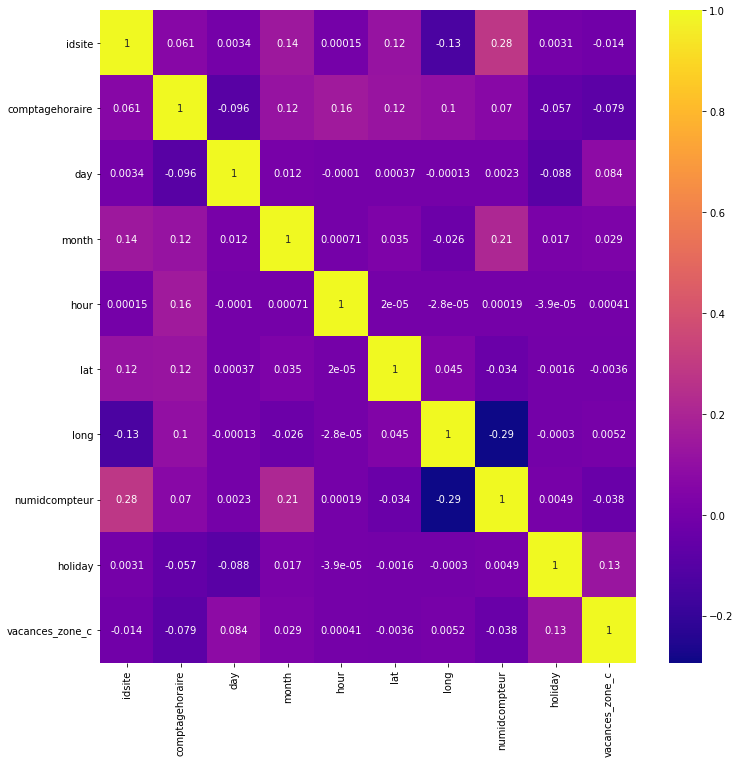

In [40]:
# Affichage de la heat map des corrélations de toutes les variables qualitatives de df
dfcor2 = df9.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dfcor2, annot= True, ax= ax, cmap="plasma");

In [41]:
#chargement du dataset des jour de grèves
df_mouv = pd.read_csv('mouvements-sociaux-depuis-2002.csv',sep=';')

#suppression des colonnes inutiles
df_mouv = df_mouv.drop(['motif','organisations_syndicales','metiers_cibles','population','nombre_grevistes','taux_grevistes'], axis=1)
#si pas de date de fin, on copie la date de début
df_mouv.date_de_fin = df_mouv.date_de_fin.fillna(df_mouv.date_de_debut)

df_mouv.date_de_fin = pd.to_datetime(df_mouv.date_de_fin,errors = 'coerce',utc = True) 
df_mouv.date_de_debut = pd.to_datetime(df_mouv.date_de_debut,errors = 'coerce',utc = True) 
df6.date= pd.to_datetime(df6.date,errors = 'coerce',utc = True)

print(df_mouv.info())
print(df6.info())

# pour chaque grève, on recherche dans df6 les lignes correspondantes

def setjourdegreve(df6,row,df_mouv):    
    df6["jourdegreve"][(row.date_de_debut <= df6['date']) & (df6['date'] <= row.date_de_fin)] = 1

df6["jourdegreve"] = 0

for i,row in enumerate(df_mouv.T):
        setjourdegreve(df6,df_mouv.T[i],df_mouv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date_de_debut  413 non-null    datetime64[ns, UTC]
 1   date_de_fin    413 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 6.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594554
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   idcompteur         594554 non-null  object             
 1   nomcompteur        594554 non-null  object             
 2   idsite             594554 non-null  float64            
 3   nomsite            594554 non-null  object             
 4   comptagehoraire    594554 non-null  float64            
 5   dateheurecomptage  594554 non-null  object             
 6   dateinstall

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [42]:
#chargement du dataset pour la météo
df_meteo_all = pd.read_csv('donnees-synop-essentielles-omm.csv',sep=';')
df_meteo = df_meteo_all[df_meteo_all['communes (name)'] =="Athis-Mons"]
df_meteo['date'] = pd.to_datetime(df_meteo.Date,errors = 'coerce',utc = True) 

df_meteo = df_meteo[df_meteo['date'].dt.year < 2020]
df_meteo = df_meteo[df_meteo['date'].dt.year > 2017]
    
df_meteo['Temps présent'] = pd.to_numeric(df_meteo['Temps présent'])
colonneagarder=['date','Temps présent']
df_meteo = df_meteo[colonneagarder]

df_meteo = df_meteo.rename(columns={ "Temps présent": "meteo"})

df_meteo['meteo_cat'] = pd.cut( df_meteo['meteo'],[0,49,69,79,84,86,94,99], labels=["Dégagé", "Pluie", "Neige","Pluie","Neige","Pluie","Orage"],ordered=False)


df_meteo['meteo'] = pd.cut( df_meteo['meteo'],[0,49,69,79,84,86,94,99], labels=[0, 1, 2,1,2,1,3],ordered=False)

df6.date = pd.to_datetime(df6.date,errors = 'coerce',utc = True)
df_meteo.date = pd.to_datetime(df_meteo.date,errors = 'coerce',utc = True)
print(df6.info())
print(df_meteo.info())

df_meteo['date'] = df_meteo['date'].dt.strftime('%Y-%m-%d')
df6['date'] = df6["date"].dt.strftime('%Y-%m-%d')

#pd.merge(df, df_meteo, on="date",how="left")
df6 = df6.merge(df_meteo,how = 'left',left_on = 'date',right_on = 'date')

df6['meteo_cat'] = df6['meteo_cat'].fillna("Dégagé")
df6['meteo'] = df6['meteo'].fillna(0)
display(df6.info())
display(df6.head(50))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 594554 entries, 0 to 594554
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   idcompteur         594554 non-null  object             
 1   nomcompteur        594554 non-null  object             
 2   idsite             594554 non-null  float64            
 3   nomsite            594554 non-null  object             
 4   comptagehoraire    594554 non-null  float64            
 5   dateheurecomptage  594554 non-null  object             
 6   dateinstall        594554 non-null  datetime64[ns]     
 7   photo              594554 non-null  object             
 8   date               594554 non-null  datetime64[ns, UTC]
 9   day                594554 non-null  float64            
 10  month              594554 non-null  float64            
 11  hour               594554 non-null  float64            
 12  lat                594554 non-

None

,idcompteur,nomcompteur,idsite,nomsite,comptagehoraire,dateheurecomptage,dateinstall,photo,date,day,month,hour,lat,long,numidcompteur,holiday,jourdegreve,meteo,meteo_cat
0,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
1,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
2,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
3,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
4,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
5,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
6,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
7,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,4.0,2018-11-29T01:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,1,Pluie
8,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,21.0,48.82648,2.303149,0,0,0,0,Dégagé
9,100047547-104047547,6 rue Julia Bartet NE-SO,100047547.0,6 rue Julia Bartet,30.0,2018-11-29T22:00:00+01:00,2018-11-28,https://www.eco-visio.net/Photos/100047547/154...,2018-11-29,3.0,11.0,21.0,48.82648,2.303149,0,0,0,0,Dégagé


In [43]:
df11=df6.groupby("dateinstall").sum()
df11.head()

,idsite,comptagehoraire,day,month,hour,lat,long,numidcompteur,holiday,jourdegreve
dateinstall,,,,,,,,,,
2012-02-13,1.395513e+13,10446825.0,418482.0,908104.0,1604887.0,6.820732e+06,328013.038132,4325957,4224,14592
2012-02-22,4.186540e+13,12495862.0,1255446.0,2724312.0,4814661.0,2.045024e+07,979072.776209,7954179,12672,43776
2013-01-17,1.396049e+13,4408407.0,418482.0,908104.0,1604887.0,6.816327e+06,331487.758432,4884145,4224,14592
2013-01-18,2.791057e+13,4428226.0,836916.0,1816184.0,3209766.0,1.363224e+07,662948.977896,3907220,8448,29184
2013-01-19,1.395558e+13,5902180.0,418482.0,908104.0,1604887.0,6.815955e+06,332593.249766,1535017,4224,14592


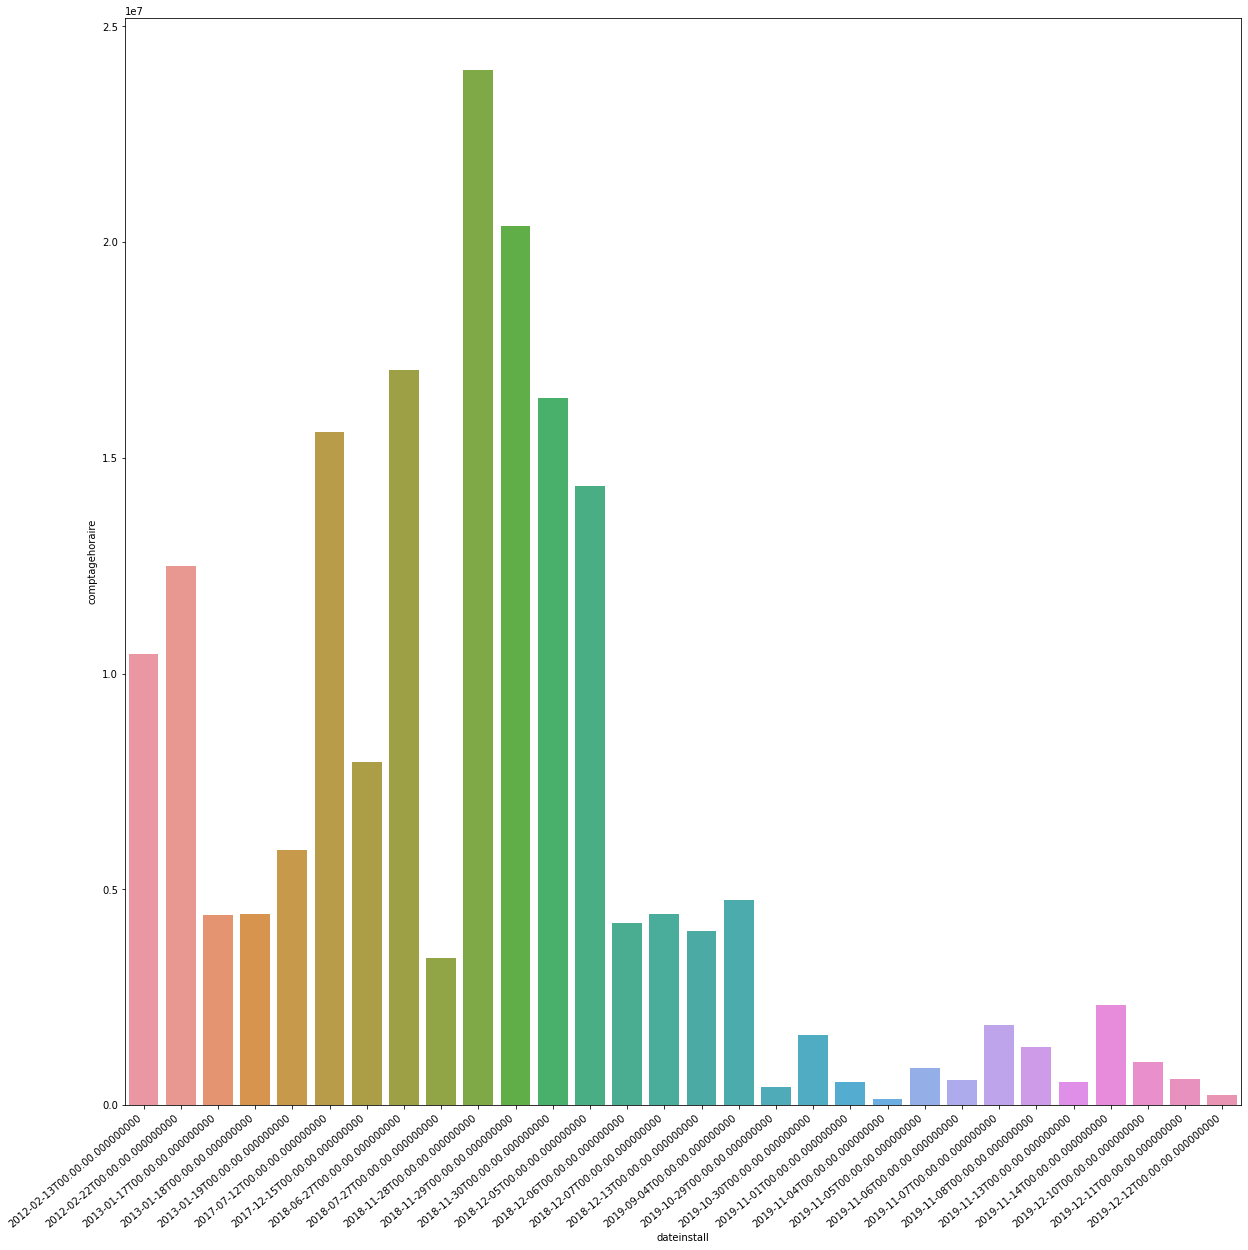

In [44]:
df11=df11.reset_index()
fig, ax = plt.subplots(figsize=(20,20))
sns.barplot(x=df11.dateinstall, y=df11["comptagehoraire"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");# Affichage de la heat map des corrélations de toutes les variables qualitatives de df


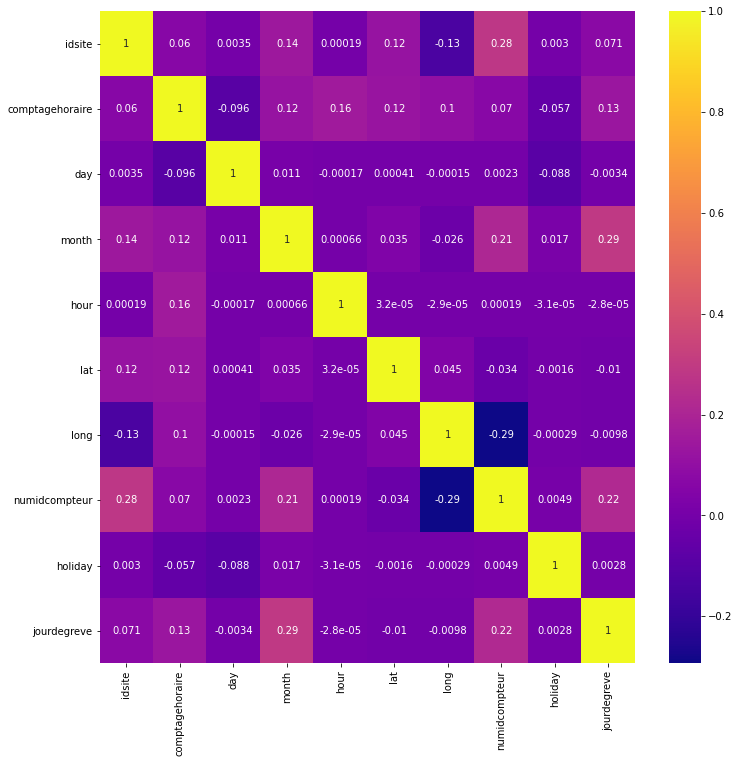

In [45]:
dfcor2 = df6.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dfcor2, annot= True, ax= ax, cmap="plasma");

In [46]:
# Modélisation = Ridge - SGD - Elastic

from sklearn.linear_model import Lasso,SGDRegressor,ElasticNet,Ridge,LinearRegression
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [106]:
df12 = df6
df12 = df12.drop(['idsite','idcompteur','nomsite','nomcompteur','dateinstall','photo'], axis=1)
df12.head()

,comptagehoraire,dateheurecomptage,date,day,month,hour,lat,long,numidcompteur,holiday,jourdegreve,meteo,meteo_cat
0,4.0,2018-11-29T01:00:00+01:00,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
1,4.0,2018-11-29T01:00:00+01:00,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
2,4.0,2018-11-29T01:00:00+01:00,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
3,4.0,2018-11-29T01:00:00+01:00,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé
4,4.0,2018-11-29T01:00:00+01:00,2018-11-29,3.0,11.0,0.0,48.82648,2.303149,0,0,0,0,Dégagé


In [107]:
df12 = df12.set_index('date')

In [108]:
df['day']=df['day'].replace(to_replace=[0,1,2,3,4,5,6] , value=['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche'] )

df['month'] =df['month'].replace(to_replace=[1,2,3,4,5,6,7,8,9,10,11,12] , value=['janvier','fevrier','mars','avril','mai','juin','juillet','aout','septembre','octobre','novembre','decembre'])

df['month']

0         novembre
1         novembre
2         novembre
3         decembre
4         decembre
            ...   
594550    decembre
594551    decembre
594552    decembre
594553    decembre
594554    decembre
Name: month, Length: 594554, dtype: object

In [109]:


cat_var = df12.select_dtypes(include='object')
num_var = df12.select_dtypes(exclude='object')

target=df12['comptagehoraire']
features=df12.drop('comptagehoraire',axis=1)

# Afin d'éviter au modèle de considéré les variables jour et mois de comptage comme variables ordianle, on décide d'utiiser 
# OneHOTencoder qui permet de transformer ces variables en une matice creuse contenant des 0 et des 1 pour chacune des 
# modalites de ces variables

encoder=OneHotEncoder()
features_enc=encoder.fit_transform(features)


In [110]:
X_train,X_test , y_train,y_test = train_test_split(features_enc,target,test_size=0.2)

In [118]:
model_ridge=Ridge(max_iter=10)
param_grid_ridge  = {'solver': ['auto', 'svd', 'cholesky'], 
                         
                        'alpha': np.linspace(0,10,15)}

In [120]:
model_sgd= SGDRegressor(max_iter=10)
param_grid_sgd = {'learning_rate': ['constant','optimal'], 
                      'penalty':    ['l2', 'l1'],
                      'alpha':      np.linspace(0.0001,1,10),
                      'loss':       ['squared_loss', 'huber'] }

In [126]:
model_elastic=ElasticNet(max_iter=1)
param_grid_elastic  ={'selection': ['cyclic', 'random'], 
                       
                        'alpha': np.linspace(0,1,15)}

In [127]:
grid_ridge= GridSearchCV(model_ridge,
                         param_grid=param_grid_ridge,
                         cv=5,
                         scoring='r2')

grid_sgd=GridSearchCV(model_sgd,
                         param_grid=param_grid_sgd,
                         cv=5,
                         scoring='r2')

grid_elastic=GridSearchCV(model_elastic,
                         param_grid=param_grid_elastic,
                         cv=5,
                         scoring='r2')

In [115]:
grid_ridge.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 762, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 552, in fit
    .format(self.solver))
ValueError: solver='svd' does not support fitting the intercept on sparse data. Please set the solver to 'auto' or 'sparse_cg', 'sag', or set `fit_intercept=False`

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Es

GridSearchCV(cv=5, estimator=Ridge(max_iter=100),
             param_grid={'alpha': array([ 0.        ,  0.71428571,  1.42857143,  2.14285714,  2.85714286,
        3.57142857,  4.28571429,  5.        ,  5.71428571,  6.42857143,
        7.14285714,  7.85714286,  8.57142857,  9.28571429, 10.        ]),
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='r2')

In [116]:
display(grid_ridge.best_params_)
display(grid_ridge.best_score_)

{'alpha': 1.4285714285714286, 'solver': 'auto'}

0.6325426976715708

In [123]:
grid_sgd.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1223: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-pa

GridSearchCV(cv=5, estimator=SGDRegressor(max_iter=10),
             param_grid={'alpha': array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00]),
                         'learning_rate': ['constant', 'optimal'],
                         'loss': ['squared_loss', 'huber'],
                         'penalty': ['l2', 'l1']},
             scoring='r2')

In [124]:
display(grid_sgd.best_params_)
display(grid_sgd.best_score_)

{'alpha': 0.0001,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'penalty': 'l1'}

0.6158293103974668

In [130]:
grid_elastic.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:516: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1830066591.287991, tolerance: 998685.2182210652
  max_iter, tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:516: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1),
             param_grid={'alpha': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
                         'selection': ['cyclic', 'random']},
             scoring='r2')

In [131]:
display(grid_elastic.best_params_)
display(grid_elastic.best_score_)

{'alpha': 0.0, 'selection': 'cyclic'}

0.6305414577677837

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge, LassoCV, Lasso
from sklearn.ensemble import RandomForestClassifier

In [ ]:
vec = [10,1,0.1,0.001,0.0005]
lasso_reg = LassoCV(alphas= vec)
lasso_reg.fit(X_train, y_train) 
print( "alpha sélectionné par c-v :" ,lasso_reg.alpha_)

lasso_r = Lasso(lasso_reg.alpha_)
lasso_r.fit(X_train, y_train)

print("score test :", lasso_r.score(X_test, y_test))

In [ ]:
print(lasso_r.coef_)
lasso_coef = lasso_reg.coef_ 
feats.columns

In [ ]:
df_percent = df6.sample(frac=1)
print(df_percent.shape)
feats = df_percent[['numidcompteur','day','month','hour','jourdegreve']]
target = df_percent.comptagehoraire
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2)
clf_rf  = RandomForestClassifier()


param_grid_rf  = [{'n_estimators': [10],
                     'min_samples_leaf': [1],
                     'max_features': ['sqrt']}]

param_grid_rf  = [{'n_estimators': [10, 50, 100, 1000],
                     'min_samples_leaf': [1, 3, 5],
                     'max_features': ['sqrt', 'log2']}]
gridcv = GridSearchCV(clf_rf,
                       param_grid=param_grid_rf,
                       scoring='accuracy',
                       cv=2) 

gridcv.fit(X_train, y_train)

pd.DataFrame(gridcv.cv_results_)[['params', 'mean_test_score', 'std_test_score']]

(4749506, 19)
